In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, auc, roc_curve
import itertools
import yaml
import os
import numpy as np
from statistics import mean
from IPython.display import clear_output
from datetime import datetime, timedelta
import time
from sklearn.metrics import precision_recall_curve, auc
pd.options.display.max_rows = 999

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y plotea la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

In [3]:
with open('configs/project_config.yml', 'r') as archivo:
    config = yaml.safe_load(archivo)

initial_wallet_value = config['start_money']


In [4]:
root_path = './backbone/data/backtest/experiments'
# root_path = 'C:/Users/SaidJ/OneDrive/Documentos/projects/forex_ml_bot/experiments 20240623'


path = 'Mode_train-Model_random_forest-TrainWw_11520-TrainPd_24-TradStgy_ml_strategy-PerFwTg_8-SL_15-RR_2-CloseByTimeTrue-TS_False'
orders = pd.read_csv(os.path.join(root_path, path, 'orders.csv'))
wallet = pd.read_csv(os.path.join(root_path, path, 'wallet.csv'))


In [5]:
orders.head(50)

,id,ticker,operation_type,open_time,close_time,open_price,last_price,close_price,profit,stop_loss,take_profit,units,profit_in_pips,comment
0,1bb3dd8b-34e3-11ef-bc92-958c92a01fe8,AUDUSD,OperationType.SELL,2022-01-03 02:00:00,2022-01-03 10:00:00,0.72653,0.72653,0.72607,3.06682,0.72803,0.72353,6667,0.00046,ClosePositionType.DAYS
1,1bc00dd4-34e3-11ef-b0bb-958c92a01fe8,USDCHF,OperationType.BUY,2022-01-03 03:00:00,2022-01-03 11:00:00,0.91319,0.91319,0.91190,-8.60043,0.91169,0.91619,6667,-0.00129,ClosePositionType.DAYS
2,1bd8d16a-34e3-11ef-aeb2-958c92a01fe8,GBPUSD,OperationType.SELL,2022-01-03 05:00:00,2022-01-03 10:00:00,1.34989,1.34989,1.35139,-10.00050,1.35139,1.34689,6667,-0.00150,ClosePositionType.STOP_LOSS
3,1c087a82-34e3-11ef-bbe4-958c92a01fe8,USDCAD,OperationType.BUY,2022-01-03 08:00:00,2022-01-03 15:00:00,1.26781,1.26781,1.27081,20.00100,1.26631,1.27081,6667,0.00300,ClosePositionType.TAKE_PROFIT
4,1eb686b8-34e3-11ef-bffd-958c92a01fe8,GBPUSD,OperationType.BUY,2022-01-04 08:00:00,2022-01-04 10:00:00,1.34635,1.34635,1.34935,20.08800,1.34485,1.34935,6696,0.00300,ClosePositionType.TAKE_PROFIT
5,1eda78f6-34e3-11ef-9cf7-958c92a01fe8,USDCAD,OperationType.SELL,2022-01-04 11:00:00,2022-01-04 14:00:00,1.27456,1.27456,1.27606,-10.24500,1.27606,1.27156,6830,-0.00150,ClosePositionType.STOP_LOSS
6,1ee08411-34e3-11ef-8e59-958c92a01fe8,AUDUSD,OperationType.BUY,2022-01-04 11:00:00,2022-01-04 13:00:00,0.72115,0.72115,0.71965,-10.24500,0.71965,0.72415,6830,-0.00150,ClosePositionType.STOP_LOSS
7,1ef55a38-34e3-11ef-8e97-958c92a01fe8,USDCHF,OperationType.SELL,2022-01-04 13:00:00,2022-01-04 17:00:00,0.91882,0.91882,0.91582,20.49000,0.92032,0.91582,6830,0.00300,ClosePositionType.TAKE_PROFIT
8,1f91bcd1-34e3-11ef-8106-958c92a01fe8,EURUSD,OperationType.BUY,2022-01-05 02:00:00,2022-01-05 10:00:00,1.12773,1.12773,1.13032,17.68970,1.12623,1.13073,6830,0.00259,ClosePositionType.DAYS
9,222b3e19-34e3-11ef-927a-958c92a01fe8,USDCHF,OperationType.BUY,2022-01-05 17:00:00,2022-01-05 21:00:00,0.91490,0.91490,0.91790,20.84400,0.91340,0.91790,6948,0.00300,ClosePositionType.TAKE_PROFIT


In [6]:
orders = orders.sort_values(by='close_time')

# Cantidad de compras y ventas

In [7]:
orders.operation_type.value_counts()

operation_type
OperationType.BUY     256
OperationType.SELL    253
Name: count, dtype: int64

# Compras que salieron bien

In [8]:
orders[(orders['operation_type']=='OperationType.BUY') & (orders['profit']>0)].shape[0] / orders[(orders['operation_type']=='OperationType.BUY')].shape[0] 

0.5859375

# Ventas que salieron bien

In [9]:
orders[(orders['operation_type']=='OperationType.SELL') & (orders['profit']>0)].shape[0] / orders[(orders['operation_type']=='OperationType.SELL')].shape[0] 

0.6877470355731226

# Cierres por SL y TP

In [10]:
orders.comment.value_counts()

comment
ClosePositionType.TAKE_PROFIT    242
ClosePositionType.STOP_LOSS      169
ClosePositionType.DAYS            98
Name: count, dtype: int64

In [11]:
# orders[(orders['comment']=='ClosePositionType.DAYS') & (orders['profit']>=0)].shape[0] / orders[(orders['comment']=='ClosePositionType.DAYS')].shape[0]

# Cierres por SL que terminaron positivos

In [12]:
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['profit']>=0)].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0.0

# Cierres por SL en que se minimizaron las perdidas

In [13]:
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['last_price']!=orders['open_price'])].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0.0

# Desempenio por ticker

In [14]:
orders_by_ticker = orders.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = (orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])) * 100
orders_by_ticker.sort_values(by='perc', ascending=False)

,ticker,positivas,negativas,profit,perc
3,USDCAD,58,24,10717.80044,70.731707
4,USDCHF,59,26,10051.85781,69.411765
0,AUDUSD,84,46,14320.55339,64.615385
1,EURUSD,54,32,10922.73963,62.790698
5,USDJPY,22,17,1490.45600,56.410256
2,GBPUSD,47,40,4004.56089,54.022989


# Rendimiento por mes

In [15]:
orders_per_month = orders[['close_time','profit', 'comment']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month
orders_per_month['day'] = orders_per_month['close_time'].dt.day


orders_per_month_gb = orders_per_month.groupby(by=['year','month']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0],'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'].shift(1))

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops'])

orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

,year,month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
0,2023,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1000.000,1000.000,NaN
0,2022,1,46,15.0,12.0,29.0,17.0,0.630,30.193,380.379,1380.379,0.380
1,2022,2,48,18.0,12.0,33.0,15.0,0.688,54.510,692.428,2072.807,0.502
2,2022,3,33,15.0,11.0,22.0,11.0,0.667,60.530,615.426,2688.234,0.297
3,2022,4,33,16.0,10.0,23.0,10.0,0.697,97.224,922.299,3610.533,0.343
4,2022,5,49,19.0,21.0,27.0,22.0,0.551,129.354,1103.566,4714.099,0.306
5,2022,6,41,22.0,10.0,29.0,12.0,0.707,136.884,2196.269,6910.368,0.466
6,2022,7,46,28.0,15.0,31.0,15.0,0.674,373.060,4154.111,11064.479,0.601
7,2022,8,55,26.0,18.0,35.0,20.0,0.636,455.860,5951.099,17015.578,0.538
8,2022,9,38,21.0,12.0,25.0,13.0,0.658,479.349,7191.583,24207.161,0.423


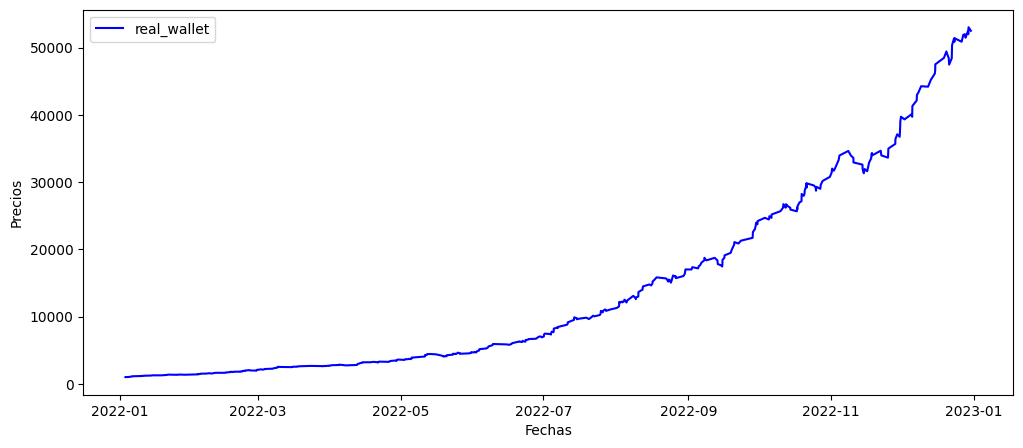

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 5))

# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [17]:
orders_per_month_gb.perc_change.mean()

0.3950833333333334

In [18]:
orders_per_month_gb.perc_change.std()

0.10949757849820103

In [19]:
change_percent = orders_per_month_gb.perc_change.reset_index().copy().drop(columns='index')
change_percent.fillna(0, inplace=True)

# Inicializar el valor de partida
initial_value = 3000

# Crear una columna para la suma acumulada
change_percent['cumulative_sum'] = initial_value

# Calcular la suma acumulada basada en los porcentajes
for i in range(1, len(change_percent)):
    change_percent.loc[i, 'cumulative_sum'] = change_percent.loc[i-1, 'cumulative_sum'] * (1 + change_percent.loc[i, 'perc_change'])

change_percent

,perc_change,cumulative_sum
0,0.000,3000.000000
1,0.380,4140.000000
2,0.502,6218.280000
3,0.297,8065.109160
4,0.343,10831.441602
5,0.306,14145.862732
6,0.466,20737.834765
7,0.601,33201.273459
8,0.538,51063.558580
9,0.423,72663.443859


# Rendimiento por dia

In [20]:
orders_per_month_gb = orders_per_month.groupby(by=['year','month', 'day']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0], 'day':[0], 'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

orders_per_month_gb = orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

orders_per_month_gb[orders_per_month_gb['month']==2]

,year,month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
17,2022,2,3,2.0,0.0,3.0,0.0,100.000,27.609,80.425,1460.805,0.055
18,2022,2,3,2.0,1.0,2.0,1.0,66.667,29.217,43.531,1504.336,0.029
19,2022,2,2,0.0,0.0,2.0,0.0,100.000,26.878,53.010,1557.346,0.034
20,2022,2,2,0.0,1.0,1.0,1.0,50.000,19.414,3.646,1560.993,0.002
21,2022,2,4,1.0,1.0,2.0,2.0,50.000,31.041,22.091,1583.084,0.014
22,2022,2,3,2.0,0.0,2.0,1.0,66.667,32.157,56.853,1639.937,0.035
23,2022,2,3,1.0,0.0,3.0,0.0,100.000,32.799,64.177,1704.114,0.038
24,2022,2,1,0.0,0.0,1.0,0.0,100.000,17.042,17.042,1721.155,0.010
25,2022,2,2,2.0,0.0,2.0,0.0,100.000,34.422,68.844,1789.999,0.038
26,2022,2,4,1.0,1.0,2.0,2.0,50.000,35.799,9.656,1799.655,0.005


In [21]:
# ticker = 'EURUSD'
# date_from = datetime(2023,1,1)
# date_to = date_from + timedelta(days=30)

# while date_to < datetime(2024,1,1):
#     date_from_str = date_from.strftime('%Y-%m-%d')
#     date_to_str = date_to.strftime('%Y-%m-%d')

#     historical_prices = pd.read_csv(f'./backbone/data/backtest/symbols/{ticker}.csv')
    
#     historical_prices = historical_prices[
#         (historical_prices['Date']>date_from_str)
#         & (historical_prices['Date']<date_to_str)
#     ]
    
#     plt.figure(figsize=(14, 7))
#     plt.plot(historical_prices['Date'], historical_prices['Close'], label='EURUSD Price', color='blue')
    
#     # Añadir las operaciones de compra y venta
#     buy_trades = orders[
#         (orders['operation_type']=='OperationType.BUY') 
#         & (orders['close_time']>date_from_str)
#         & (orders['close_time']<date_to_str)
#         & (orders['ticker']==ticker)
#     ]
#     sell_trades = orders[
#         (orders['operation_type']=='OperationType.SELL') 
#         & (orders['close_time']>date_from_str)
#         & (orders['close_time']<date_to_str)
#         & (orders['ticker']==ticker)
#     ]
    
#     # Graficar las operaciones de compra
#     plt.scatter(buy_trades['open_time'], buy_trades['open_price'], color='green', marker='^', s=100, label='Buy Open')
#     plt.scatter(buy_trades['close_time'], buy_trades['close_price'], color='lime', marker='o', s=100, label='Buy Close')
    
#     # Graficar las operaciones de venta
#     plt.scatter(sell_trades['open_time'], sell_trades['open_price'], color='red', marker='v', s=100, label='Sell Open')
#     plt.scatter(sell_trades['close_time'], sell_trades['close_price'], color='orange', marker='o', s=100, label='Sell Close')
    
#     # Añadir etiquetas y leyenda
#     plt.xlabel('Date')
#     plt.ylabel('Price')
#     plt.title('EURUSD Price with Buy/Sell Trades')
#     plt.legend()
    
#     # Mostrar el gráfico
#     plt.show()
    
#     print(date_from_str, date_to_str)
   
#     a = input()
    
#     clear_output(wait=True)

#     date_from += timedelta(days=7)
#     date_to = date_from + timedelta(days=15)


In [22]:
orders_per_month = orders[['close_time','comment', 'ticker', 'profit']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month
orders_per_month['day'] = orders_per_month['close_time'].dt.day

orders_per_month_gb = orders_per_month.groupby(by=['year','month', 'day']).agg(
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit=('profit', lambda x: (x).sum()),

)

orders_per_month_gb['tp_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['take_profit'].cumsum()
orders_per_month_gb['sl_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['stop_loss'].cumsum()
orders_per_month_gb['profit_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['profit'].cumsum()
orders_per_month_gb

take_profit  stop_loss      profit  tp_cumsum  sl_cumsum  \
year month day                                                             
2022 1     3              1          1     4.46689          1          1   
           4              2          2    20.08800          3          3   
           5              2          0    59.37770          5          3   
           6              2          0    43.35600          7          3   
           7              1          1    16.91460          8          4   
           10             1          0    45.46288          9          4   
           11             1          1    34.63354         10          5   
           12             0          1   -12.30000         10          6   
           14             0          0    52.11600         10          6   
           18             0          0     7.33149         10          6   
           19             0          1    19.31254         10          7   
           21             2          0    82.33888         12          7   
           24             0          2   -16.59128         12          9   
           25             1          0    12.75063         13          9   
           26             1          1    11.51304         14         10   
           28             0          2   -27.45750         14         12   
           31             1          0    27.06600         15         12   
     2     3              2          0    80.42522          2          0   
           4              2          1    43.53150          4          1   
           7              0          0    53.01020          4          1   
           8              0          1     3.64634          4          2   
           9              1          1    22.09098          5          3   
           10             2          0    56.85336          7          3   
           15             1          0    64.17671          8          3   
           16             0          0    17.04150          8          3   
           17             2          0    68.84400         10          3   
           18             1          1     9.65583         11          4   
           21             0          1    22.78868         11          5   
           22             3          0   109.20000         14          5   
           23             1          2    39.43786         15          7   
           24             1          0    39.42300         16          7   
           25             1          3   -20.30400         17         10   
           28             1          2    82.60675         18         12   
     3     1              1          0    41.45700          1          0   
           2              1          1    20.73450          2          1   
           3              1          1    51.68124          3          2   
           4              0          0    22.59400          3          2   
           7              2          0    89.25300          5          2   
           8              0          0    60.52980          5          2   
           9              3          0   176.17620          8          2   
           10             0          1   -25.35300          8          3   
           15             1          2     0.30000          9          5   
           16             1          0    50.20500         10          5   
           17             1          1    25.09650         11          6   
           18             1          1    25.33650         12          7   
           23             1          0    54.99980         13          7   
           28             0          2   -53.31600         13          9   
           29             1          1    26.12550         14         10   
           31             1          1    49.60635         15         11   
     4     1              1          0    80.68302          1          0   
           4              1          0    87.86484          2   

# Que hubiera pasado si no se operaba con algunos tickers?

In [23]:
tickers_permitidos = orders_by_ticker[orders_by_ticker['profit']>0].ticker.unique()
print(tickers_permitidos)

# tickers_permitidos = [
#     'EURUSD', 
#     'GBPUSD', 
#     'USDJPY', 
#     'USDCAD', 
#     'AUDUSD', 
#     'USDCHF'
# ]

orders_min = orders_per_month[orders_per_month['ticker'].isin(tickers_permitidos)].copy().reset_index()

['AUDUSD' 'EURUSD' 'GBPUSD' 'USDCAD' 'USDCHF' 'USDJPY']


# Rendimiento por mes

In [24]:
orders_per_month_gb = orders_min.groupby(by=['year','month', 'day']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0], 'day':[0], 'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

orders_per_month_gb = orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

orders_per_month_gb[orders_per_month_gb['month']==2]

,year,month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
17,2022,2,3,2.0,0.0,3.0,0.0,100.000,27.609,80.425,1460.805,0.055
18,2022,2,3,2.0,1.0,2.0,1.0,66.667,29.217,43.531,1504.336,0.029
19,2022,2,2,0.0,0.0,2.0,0.0,100.000,26.878,53.010,1557.346,0.034
20,2022,2,2,0.0,1.0,1.0,1.0,50.000,19.414,3.646,1560.993,0.002
21,2022,2,4,1.0,1.0,2.0,2.0,50.000,31.041,22.091,1583.084,0.014
22,2022,2,3,2.0,0.0,2.0,1.0,66.667,32.157,56.853,1639.937,0.035
23,2022,2,3,1.0,0.0,3.0,0.0,100.000,32.799,64.177,1704.114,0.038
24,2022,2,1,0.0,0.0,1.0,0.0,100.000,17.042,17.042,1721.155,0.010
25,2022,2,2,2.0,0.0,2.0,0.0,100.000,34.422,68.844,1789.999,0.038
26,2022,2,4,1.0,1.0,2.0,2.0,50.000,35.799,9.656,1799.655,0.005


In [25]:
orders_min['wallet'] = orders_min['profit']
orders_min.loc[0, 'wallet'] = initial_wallet_value + orders_min.iloc[0]['profit']
orders_min['wallet'] = orders_min['wallet'].cumsum()

In [26]:
orders_by_ticker = orders_min.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])
orders_by_ticker.sort_values(by='perc', ascending=False)

,ticker,positivas,negativas,profit,perc
3,USDCAD,58,24,10717.80044,0.707317
4,USDCHF,59,26,10051.85781,0.694118
0,AUDUSD,84,46,14320.55339,0.646154
1,EURUSD,54,32,10922.73963,0.627907
5,USDJPY,22,17,1490.45600,0.564103
2,GBPUSD,47,40,4004.56089,0.540230


In [27]:
orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS') & (orders_min['profit']>=0)].shape[0] / orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0.0

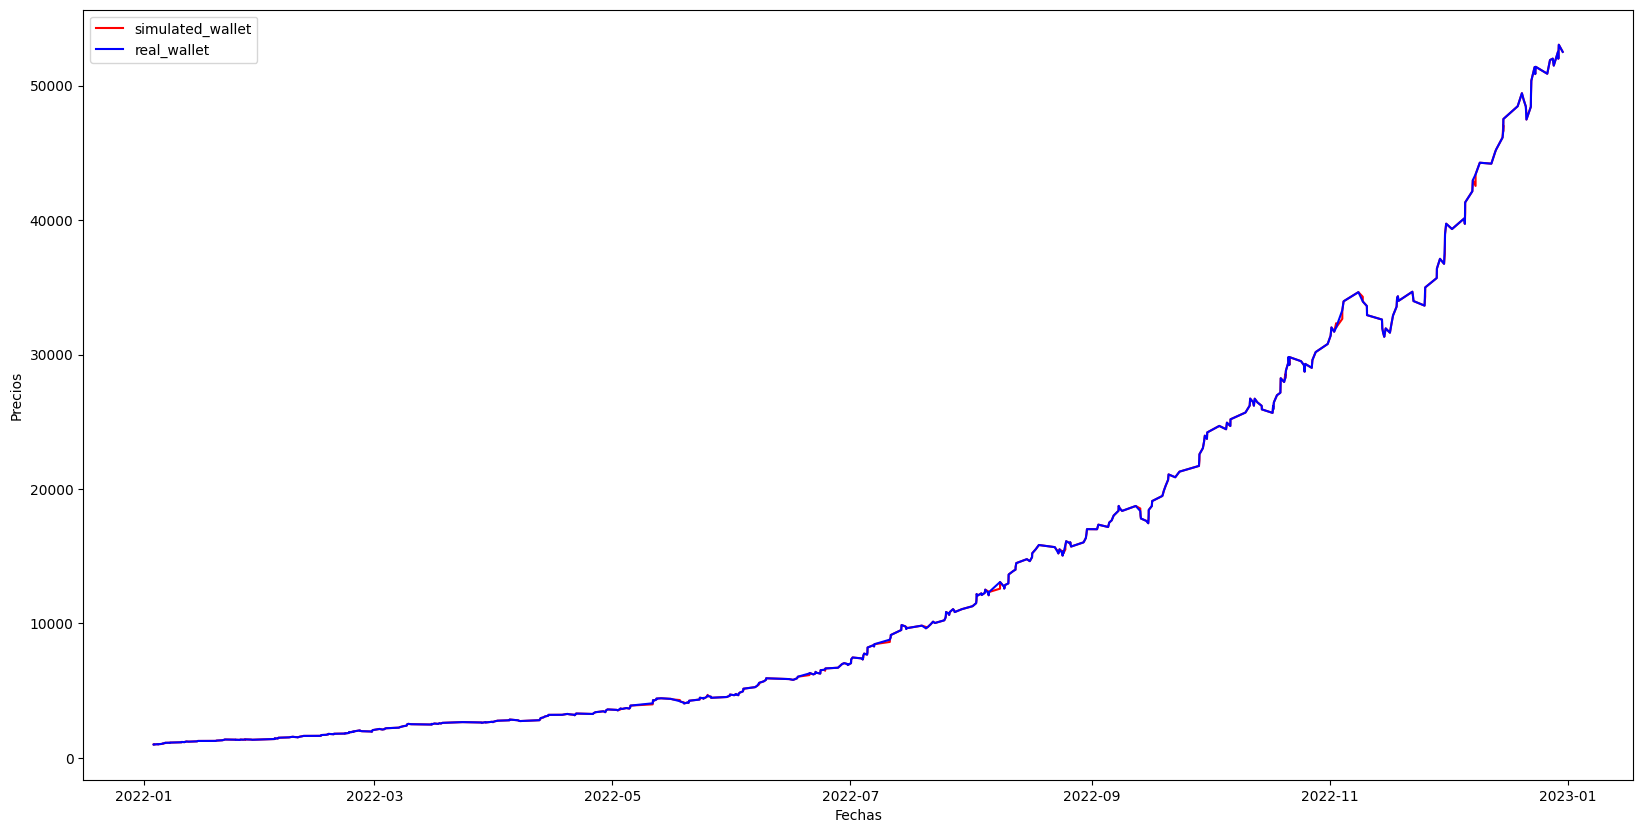

In [28]:
import matplotlib.pyplot as plt
import numpy as np


# Datos de ejemplo
x_wallet = pd.to_datetime(orders_min['close_time'])
y_wallet = orders_min['wallet']  # Datos para la línea
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='simulated_wallet', color='red')



# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [29]:
true_values = pd.read_csv(os.path.join(root_path, path, 'trainres.csv'))
predictions = pd.read_csv(os.path.join(root_path, path, 'test_res.csv')).dropna()

In [30]:
predictions

,y_true,y_pred,proba
0,0.0,1.0,36446 0.538534\n7998 0.601852\n50670 ...
1,0.0,1.0,22223 0.590784\n64895 0.513817\n79119 ...
2,0.0,0.0,36449 0.539527\n22225 0.501292\n64897 ...
3,1.0,0.0,22227 0.540961\n8003 0.569055\n50675 ...
4,0.0,0.0,22228 0.534553\n50676 0.560469\n8004 ...
...,...,...,...
5407,0.0,1.0,71079 0.593980\n28407 0.531231\n56855 ...
5408,0.0,1.0,42634 0.639646\n56858 0.551733\n71082 ...
5409,0.0,1.0,28413 0.502555\n56861 0.501384\n14189 ...
5410,0.0,1.0,85311 0.519381\n14191 0.530774\n42639 ...


In [31]:
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, classification_report


precision = precision_score(predictions.y_true, predictions.y_pred, average='weighted')
recall = recall_score(predictions.y_true, predictions.y_pred, average='weighted')
f1 = f1_score(predictions.y_true, predictions.y_pred, average='weighted')

print(precision)
print(recall)
print(f1)

0.7857988470680934
0.4525129342202513
0.5349809339185396


In [32]:
print(classification_report(predictions['y_true'], predictions['y_pred']))

              precision    recall  f1-score   support

         0.0       0.88      0.43      0.58      4738
         1.0       0.13      0.58      0.21       674

    accuracy                           0.45      5412
   macro avg       0.50      0.51      0.40      5412
weighted avg       0.79      0.45      0.53      5412



<Axes: >

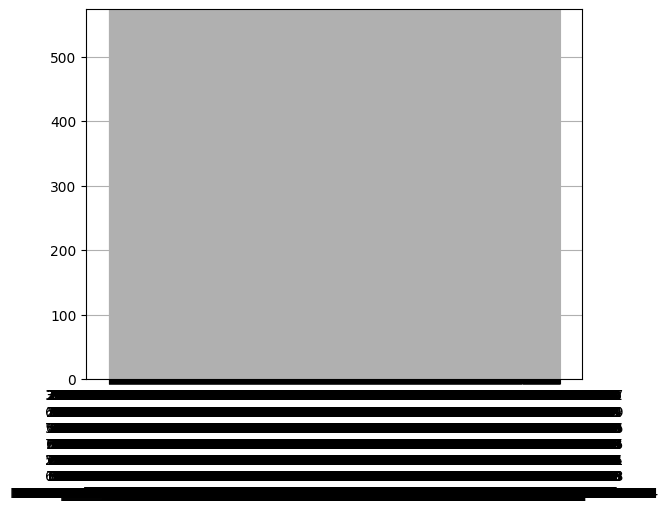

In [33]:
predictions.proba.hist()

              precision    recall  f1-score   support

         0.0       0.88      0.43      0.58      4738
         1.0       0.13      0.58      0.21       674

    accuracy                           0.45      5412
   macro avg       0.50      0.51      0.40      5412
weighted avg       0.79      0.45      0.53      5412

Confusion Matrix
[[2057 2681]
 [ 282  392]]


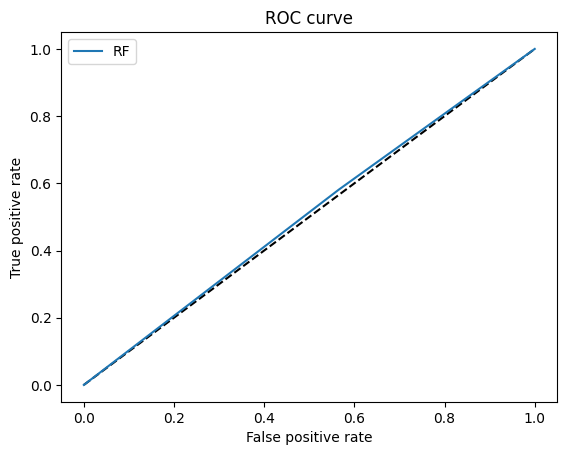

In [34]:
fpr_rf, tpr_rf, _ = roc_curve(predictions['y_true'], predictions['y_pred'])
print(classification_report(predictions['y_true'], predictions['y_pred']))

print("Confusion Matrix")
print(confusion_matrix(predictions['y_true'], predictions['y_pred']))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [35]:
predictions['binary_pred'] = np.where(
    (predictions['y_pred']==0), 
    1 - predictions['proba'], 
    predictions['proba']
)

predictions

TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [ ]:
len(precision)

In [ ]:
precision, recall, thresholds = precision_recall_curve(predictions['y_true'], predictions['binary_pred'])
pr_auc = auc(recall, precision)
# Plotear la curva de precisión/recall
plt.figure(figsize=(20, 10))

plt.plot(thresholds[800:1000], precision[800:1000], marker='.', label=f'Random Forest (AUC = {pr_auc:.2f})')
plt.plot(thresholds[800:1000], recall[800:1000], marker='.', label=f'Random Forest (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
len(thresholds)

In [ ]:
predictions.y_true.value_counts() * 0.01

In [ ]:
threshold = 0.523
preds = np.where(
    (predictions['binary_pred']<=threshold),
    0, 
    1
)

print(classification_report(predictions.y_true, preds))

In [ ]:
predictions[predictions['proba']>threshold]

In [ ]:
predictions.head(50)

In [ ]:


from sklearn.metrics import precision_score, f1_score, recall_score



tickers = config["tickers"] 
tickers

predictions = predictions.sort_values(by='fecha')
true_values = true_values.sort_values(by='fecha')


# renombro las columnas
column_names = {}
for column in predictions.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_preds'

predictions = predictions.rename(columns=column_names)

column_names = {}
for column in true_values.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_true'

true_values = true_values.rename(columns=column_names)
performance = pd.concat(
    [
        predictions,
        true_values
    ], axis=1, join="inner"
)

recall_list = []
f1_list = []
precision_list = []

for ticker in tickers:
    y_true = performance[performance[f'{ticker}_true'].notna()][f'{ticker}_true']
    y_pred = performance[performance[f'{ticker}_preds'].notna()][f'{ticker}_preds']
    
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # print(classification_report(performance[f'{ticker}_true'], performance[f'{ticker}_preds'], target_names=target_names))
    
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    

# Grafico de velas

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Candlestick(x=prices['Date'],
#                 open=prices['Open'],
#                 high=prices['High'],
#                 low=prices['Low'],
#                 close=prices['Close'])])

# fig.update_layout(
#     title=f"{config['ticker']}",
#     yaxis_title=f"{config['ticker']} Stock"
# )

# fig.show()

# Estrategia

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['fecha'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

ax.plot(x_wallet, y_wallet, label='wallet', color='purple')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['date'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc

print('Area bajo la curva: ', auc(wallet.index, wallet['wallet']))

# Datos de ejemplo
x_prices = pd.to_datetime(wallet['date'])
y_prices = wallet['wallet']  # Datos para la línea


# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='Wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


# Modelo

In [ ]:
predictions.sort_values(by='fecha')

In [ ]:
true_values.sort_values(by='fecha')

In [ ]:
accuracy_score(predictions[predictions['YPF'].notna()].YPF, true_values[true_values['YPF'].notna()].YPF)

In [ ]:
threshold_down = 0.5
threshold_up = 0.5

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
threshold_down = 0.1
threshold_up = 0.9

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
plt.hist(performance.y_pred, color='lightgreen', ec='black', bins=50)
plt.show()

In [ ]:
buys = buys.rename(columns={''})

In [ ]:
operations = pd.concat([buys[buys['YPF'].notna()], sells[sells['YPF'].notna()]], axis=1, join="inner")[['fecha','YPF']]
operations

In [ ]:
operations['positive'] = np.where(operations['buy']>operations['sell'], 0, 1)
operations['Profit'] = operations['sell'] - operations['buy'] 
operations['positive'].value_counts()